# **Análise dos Dados do Airbnb -  Rio de Janeiro**
<p align="center">
<img src='https://camo.githubusercontent.com/5ba526232398bb45724fc5028c20a650d2acaaa8/68747470733a2f2f7777772e617265613336302e636f6d2e61752f77702d636f6e74656e742f75706c6f6164732f323031372f30392f616972626e622d6c6f676f2e6a7067' width="200"/>
</p>



Se você ainda não conhece essa empresa que só vem ganhando o coração dos viajantes, eu trago uma breve explicação do que o [Airbnb](https://pt.wikipedia.org/wiki/) oferece. 

Airbnb é um serviço online comunitário para as pessoas anunciarem, descobrirem e reservarem acomodações e meios de hospedagem.

O Airbnb permite aos indivíduos alugar o todo ou parte de sua própria casa, como uma forma de acomodação extra. O site fornece uma plataforma de busca e reservas entre a pessoa que oferece a acomodação e o turista que busca pela locação.


Os dados utilizados nesta análise foram obtidos através do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

In [ ]:
!pip install missingno

# importar os pacotes necessários
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

# configurar as visualizações
sns.set_style('darkgrid')
sns.set_palette('Accent')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# obtendo os dados
data_path = 'http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv'
df = pd.read_csv(data_path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358


## **Dicionário de variáveis**
---

> *   **id** - número de id gerado para identificar o imóvel
> *   **name** - nome da propriedade anunciada
> *   **host_id** - número de id do proprietário (anfitrião) da propriedade
> *   **host_name** - Nome do anfitrião
> *   **neighbourhood_group** - esta coluna não contém nenhum valor válido
> *   **neighbourhood** - nome do bairro
> *   **latitude** - coordenada da latitude da propriedade
> *   **longitude** - coordenada da longitude da propriedade
> *   **room_type** - informa o tipo de hospedagem que é oferecido
> *   **price** - preço para alugar o imóvel
> *   **minimum_nights** - quantidade mínima de noites para reservar
> *   **number_of_reviews** - número de reviews que a propriedade possui
> *   **last_review** - data do último review
> *   **reviews_per_month** - quantidade de reviews por mês
> *   **calculated_host_listings_count** - quantidade de imóveis do mesmo anfitrião
> *  **availability_365** - número de dias de disponibilidade dentro de 365 dias






# **Análise dos Dados**

> **Quantos atributos/variáveis/colunas e quantas entradas/linhas possui o nosso 
dataset?**

In [ ]:
print('DIMENSÕES DO DATAFRAME:')
print(f'Linhas:  {df.shape[0]}')
print(f'Colunas:  {df.shape[1]}')

DIMENSÕES DO DATAFRAME:
Linhas:  35870
Colunas:  16


> **Quais são os tipos de dados (dtypes) das nossas variáveis?**

In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
df.dtypes.value_counts()

int64      7
object     5
float64    4
dtype: int64

> **Nosso dataset possui valores ausentes?**

In [ ]:
df.isna().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group                True
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [ ]:
df.isna().sum()

id                                    0
name                                 58
host_id                               0
host_name                             5
neighbourhood_group               35870
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       14766
reviews_per_month                 14766
calculated_host_listings_count        0
availability_365                      0
dtype: int64

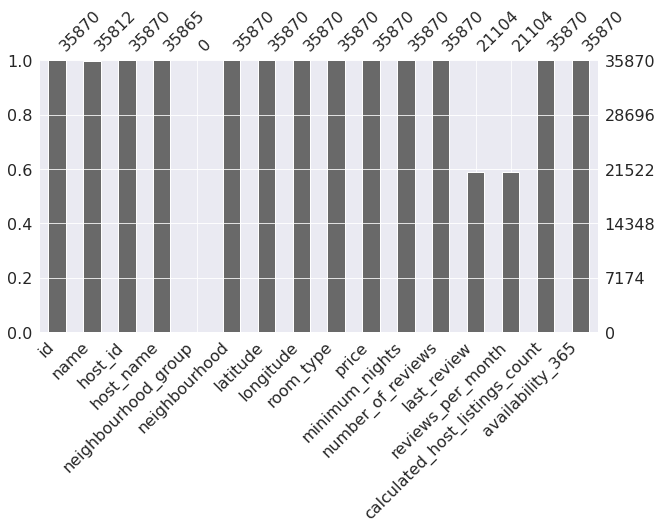

In [ ]:
# visualização das entradas de cada coluna, aqui podemos notar visualmente as colunas com valores NaN
msno.bar (df, figsize = (10,5));

> Como vimos anteriormente, nosso dataset possui 35870 entradas. E analisando os valores ausentes no comando anterior notamos que a variável *neighbourhood_group* não tem dados. Sendo assim, ela não acrescentará em nada na nossa análise, vamos deletar essa variável do nosso DataFrame. 

In [ ]:
df.drop('neighbourhood_group', axis=1, inplace=True)

> **Verificando agora a porcentagem de valores ausentes de cada coluna**

As colunas *reviews_per_month* e *last_review* contém 41,16% de dados ausentes aproximadamente. Já as colunas *name* e *host_name* contém  aproximadamente, 0,16% e 0,01% respectivamente. 

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / len(df)).sort_values(ascending=False) * 100

reviews_per_month                 41.165319
last_review                       41.165319
name                               0.161695
host_name                          0.013939
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

In [ ]:
# contagem de valores distintos ordenados por ordem decrescente
df.nunique().sort_values(ascending=False)

id                                35870
name                              34663
host_id                           25087
longitude                         14997
latitude                          11295
host_name                          6447
last_review                        1465
price                              1316
reviews_per_month                   499
availability_365                    366
number_of_reviews                   265
neighbourhood                       155
minimum_nights                       78
calculated_host_listings_count       48
room_type                             4
dtype: int64

> **Histograma das variáveis**

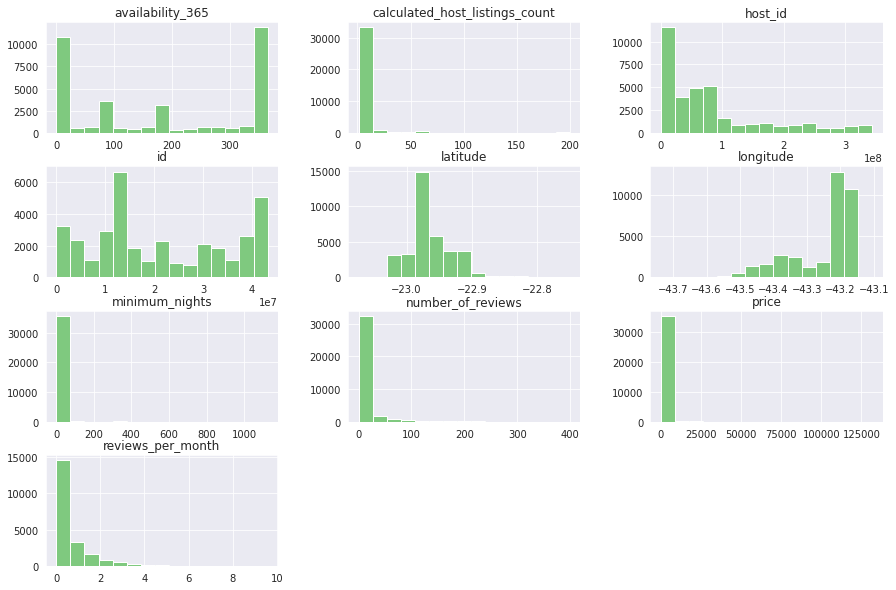

In [ ]:
# análise visual das variáveis númericas através de um gráfico de frequências (histograma)
df.hist(bins=15, figsize=(15,10));

> Notamos que há índicios da presença de outliers nos nossos dados, como vemos nas colunas *price*, *minimum_nights* e *calculated_host_listings_count*.
Um dos indícios é o fato de não conseguirmos visualizar uma distribuição porque possivelmente os outliers, se presentes, estão distorcento a representação gráfica.
>
> **Detecção de Outliers:**



In [ ]:
# visualizando um resumo estatístico das variáveis númericas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,35870.00,35870.00,35870.00,21104.00,35870.00,35870.00
mean,753.69,4.78,9.82,0.65,6.61,180.37
std,2229.37,22.47,25.83,0.82,22.77,152.51
min,0.00,1.00,0.00,0.01,1.00,0.00
25%,158.00,1.00,0.00,0.13,1.00,0.00
50%,298.00,2.00,1.00,0.34,1.00,178.00
75%,632.00,4.00,6.00,0.83,3.00,363.00
max,131727.00,1123.00,399.00,9.57,200.00,365.00


> **Pontos principais da análise feita através do método describe.**
>
> *   O valor mínimo da variável *price* é 0
> *   O valor máximo da variável *price* é 131.727
> *   O valor máximo da variável *minimum_nights* é 1.123
>*   O valor máximo da variável *calculated_host_listinings_count* é 200



> **Boxplot das variáveis que possivelmente apresentam outliers** 

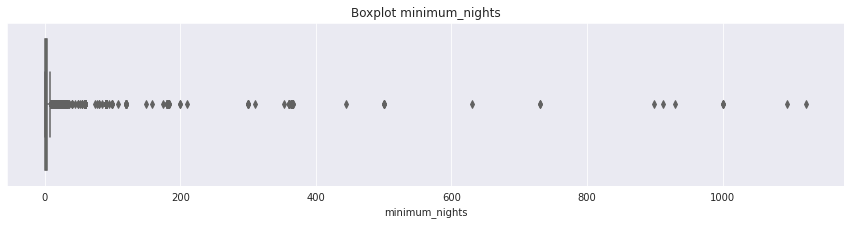

[minimun_nights]
Valores acima de 30: 224 entradas
Porcentagem: 0.6245%


In [ ]:
plt.figure(figsize=(15,3))
sns.boxplot(data=df, x='minimum_nights')
plt.title('Boxplot minimum_nights')
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print(f'[minimun_nights]\nValores acima de 30: {len(df[df.minimum_nights > 30])} entradas')
print('Porcentagem: {:.4f}%'.format(len(df[df.minimum_nights > 30])/ len(df.minimum_nights)* 100))

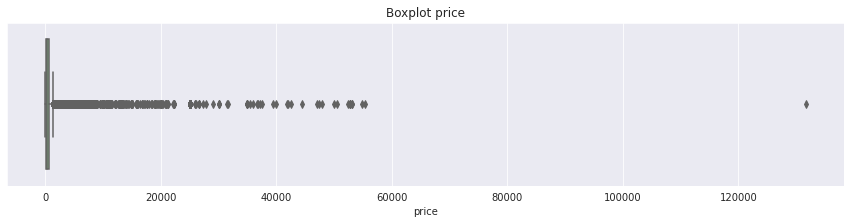

[price]
Valores acima de 1500: 3360 entradas
Porcentagem: 9.3672%


In [ ]:
plt.figure(figsize=(15,3))
sns.boxplot(data=df, x='price')
plt.title('Boxplot price')
plt.show()

# ver quantidade de valores acima de 1500 para price
print(f'[price]\nValores acima de 1500: {len(df[df.price > 1500])} entradas')
print('Porcentagem: {:.4f}%'.format(len(df[df.price > 1500])/ len(df.price) * 100))

> **Histograma sem Outlier**
>
>Depois de identificar os outliers, vamos plotar novamente o histograma para visualizarmos os dados limpos

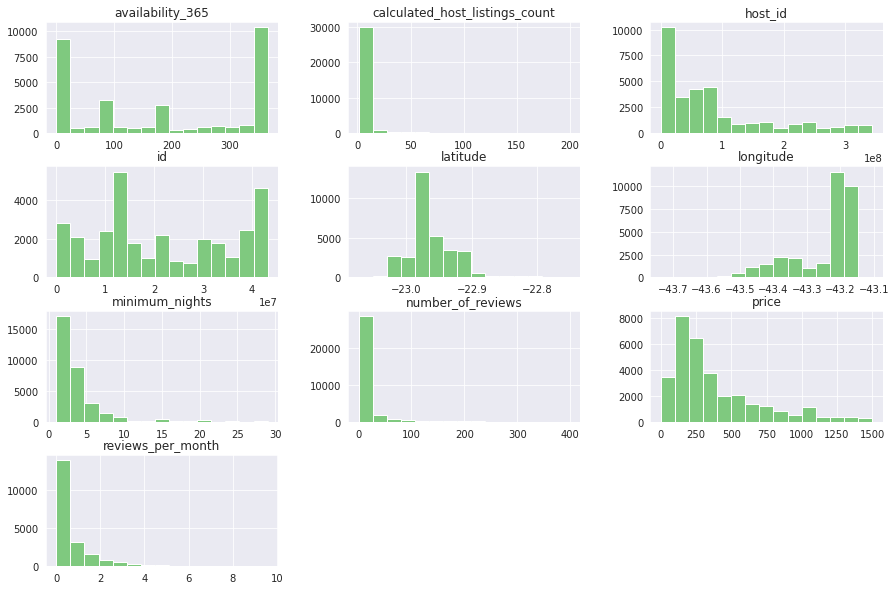

In [ ]:
# histogramas com valores de minimum_nights menor que 30 e price menor que 1500
df_clean = df.copy()
df_clean = df_clean.query('minimum_nights < 30 & price < 1500')
df_clean.hist(bins=15, figsize=(15,10));

>  **Correlação existente entre as variáveis**
>
> Correlação é a relação estatística entre duas variáveis. 
Os coeficientes de correlação são métodos estatísticos para se medir as relações entre variáveis.
>
> Calculamos o coeficiente de correlação com a função *corr()*
> 
> Irei apresentar essa correlação através de uma matriz e de uma forma mais
> visual através de um heatmap (mapa de calor).




In [ ]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.219077,-0.162335,-0.162817,0.047687,-0.016761
minimum_nights,0.219077,1.000000,-0.068732,-0.102282,-0.030811,-0.047807
number_of_reviews,-0.162335,-0.068732,1.000000,0.645315,-0.026934,0.052824
reviews_per_month,-0.162817,-0.102282,0.645315,1.000000,-0.014393,-0.019017
calculated_host_listings_count,0.047687,-0.030811,-0.026934,-0.014393,1.000000,0.074940
availability_365,-0.016761,-0.047807,0.052824,-0.019017,0.074940,1.000000


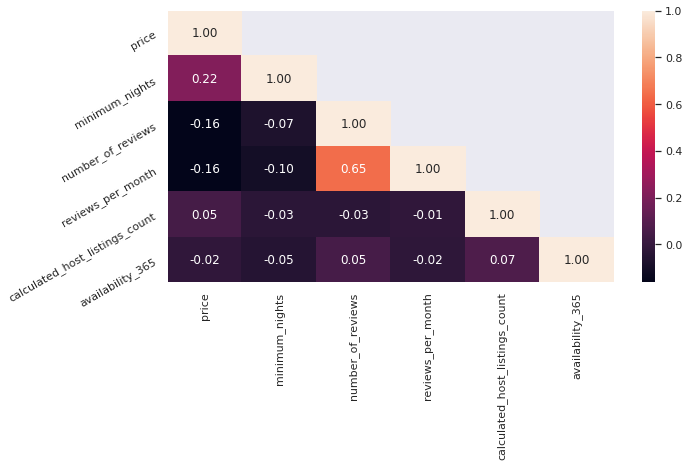

In [ ]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10,5))
# criando uma máscara para ver apenas os valores de correlação uma vez
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

> **Qual é o tipo de hospedagem mais alugado?**


In [ ]:
# a quantidade de cada tipo de imóvel disponível
df_clean['room_type'].value_counts()

Entire home/apt    22209
Private room        8884
Shared room          756
Hotel room           159
Name: room_type, dtype: int64

In [ ]:
# porcentagem de cada tipo de imóvel disponível
df_clean['room_type'].value_counts() / len(df_clean)

Entire home/apt    0.693858
Private room       0.277556
Shared room        0.023619
Hotel room         0.004968
Name: room_type, dtype: float64

>  **Qual é a localidade mais cara?**

In [ ]:
# média de preço do top 10 localidades mais caras
df_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:10]

neighbourhood
Vaz Lobo                  875.666667
Engenheiro Leal           800.000000
Ricardo de Albuquerque    601.200000
Paciência                 562.375000
Lagoa                     525.489097
Abolição                  483.666667
Leblon                    481.073646
Anchieta                  475.600000
Engenho de Dentro         475.271429
Joá                       474.217391
Name: price, dtype: float64

> Observação: Como podemos ver existem bairros com mais imóveis alugados, 
o que pode influenciar diretamente na média de preços por localidade feita anteriormente

In [ ]:
# contagem de imóveis por localidade
df_clean['neighbourhood'].value_counts()

Copacabana           8786
Barra da Tijuca      3185
Ipanema              2688
Jacarepaguá          1766
Botafogo             1663
                     ... 
Jardim América          1
Praia da Bandeira       1
Parque Colúmbia         1
Honório Gurgel          1
Vista Alegre            1
Name: neighbourhood, Length: 155, dtype: int64

> **Plotando os imóveis pela latitude-longitude**

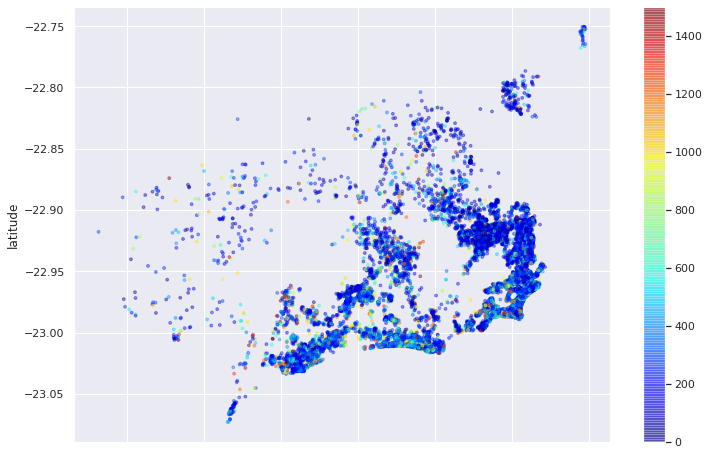

In [ ]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

>  **Conclusões:**
>
>
> *   Aqui foi feita uma análise superficial sobre os dados disponíveis no arquivo citado anteriormente. Para uma análise mais completa recomendo que seja utilizado o dataset que contém mais variáveis/atributos.
> *   Conseguimos identificar valores ausentes e outliers, fazer seu tratamento, plotamos alguns gráficos para análise e no final conseguimos responder algumas perguntas.



